**How to remove outliers ?**

1) Z-Score :

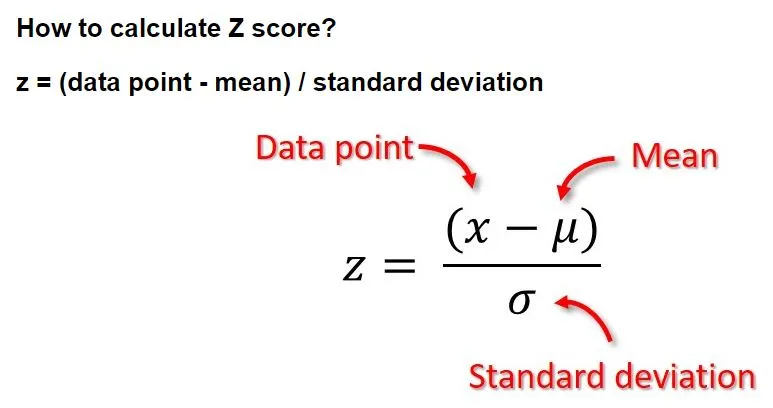

this is a way to make data normalized (in the range =[-1,1])

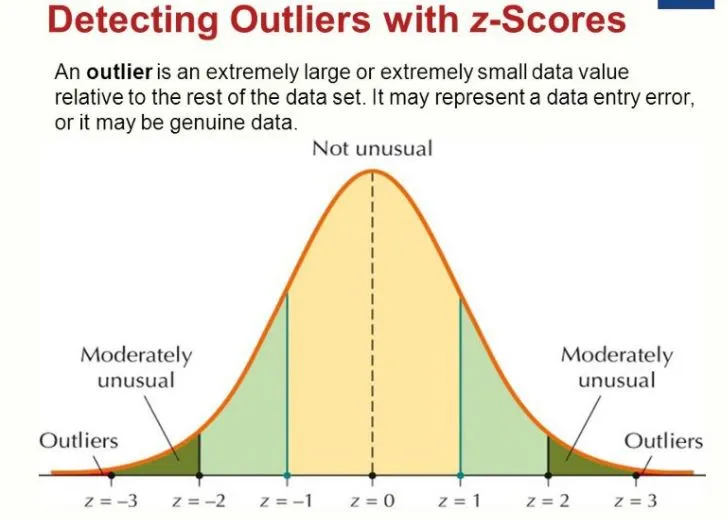

***Outliers are values at z > 2 or z < -2***

2) IQR Method - Interquartile range :
* IQR = Q3 - Q1

**Any value, which is beyond the range of Q1-1.5*(IQR) to Q3+1.5*(IQR) treated as outliers.**

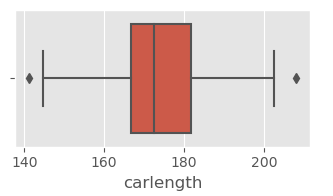

*As we see in the diagram above, IQR = Q3-Q1 = 182-166 = 16*

* MaxValue = Q3 + 1.5 * IQR = 182+(1.5*16) = 182+24 = 206
* MinValue = Q1 - 1.5 * IQR = 166-(1.5*16) = 166-24 = 146

**That means that 146 > anyvalue > 206 (seperately) is an outlier**

**There are some techniques used to deal with outliers:**
* Deleting observations
* Transforming values
* Imputation
* Separately treating

***Note : deleting the observation is not a good idea when we have small dataset.***

**1) Deleting observations :**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [24]:
df = pd.read_csv("data/CarPrice_Assignment.csv")

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


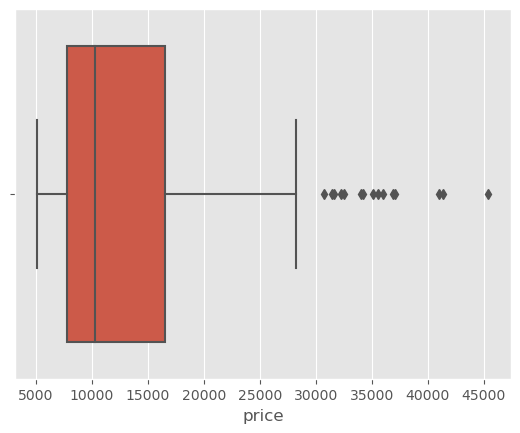

In [25]:
sns.boxplot(df["price"])
plt.show()

In [9]:
def drop_outliers(df, featurename):
    Q3 = np.percentile(df[featurename], 75)
    Q1= np.percentile(df[featurename], 25)
    IQR = Q3 - Q1
    Max_Val = Q3 + (1.5*IQR)
    Min_Val = Q1 - (1.5*IQR)
    df.drop(df[df[featurename] > Max_Val].index, inplace=True)
    df.drop(df[df[featurename] < Min_Val].index, inplace=True)

In [10]:
drop_outliers(df, 'price')

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


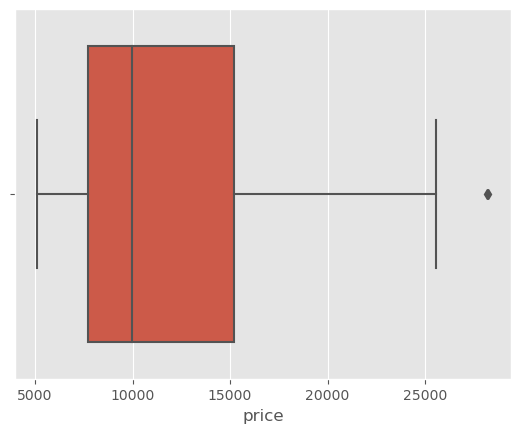

In [11]:
sns.boxplot(df["price"])
plt.show()

**2) Transforming values :**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["price"] = scaler.fit_transform(df["price"].values.reshape(-1,1))

In [20]:
df.shape

(205, 26)

Then remove values greater than 2 and values less than -2

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


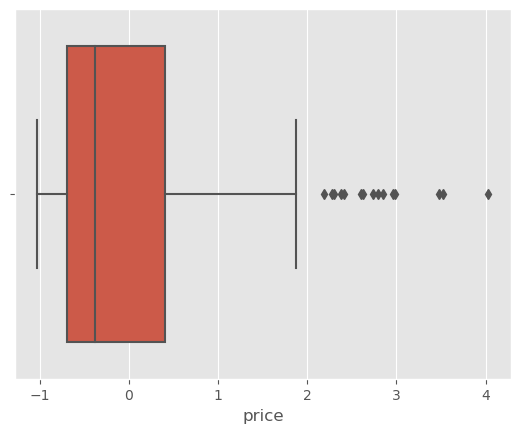

In [22]:
sns.boxplot(df["price"])
plt.show()

In [26]:
df["price"] = np.log(df["price"])

In [27]:
df["price"]

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

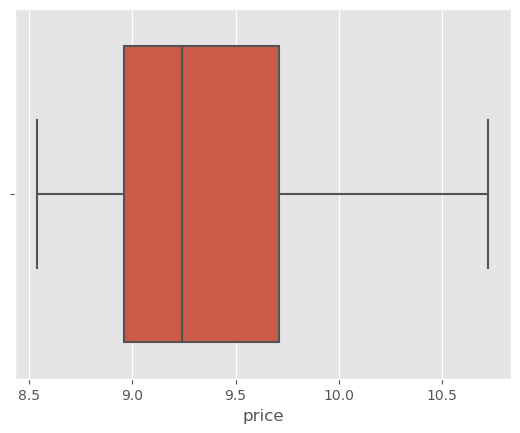

In [28]:
sns.boxplot(df["price"])

***3) cube transformation about dividing the vector by 3***

***4) Impute the outliers with median/mean (but median is better)*** or ***Impute by zero values***

*useful link :- https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8*